### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv("../data/coupons.csv")

In [31]:
# give a basic view of the data set with just the header elements and the columns in the datafile
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [8]:
# Investigate the data primarily to clean up
# Check on dulplicate and remove them
# Also check if there are any null's in data
# Print the resultant count and the percentages
# Next we can decide as to what to do with the data.

duplicate = data[data.duplicated(keep='last')]
data = data.drop_duplicates()

print("After Duplicate Records Removal:", data.shape)

null_in_data = data.isnull().sum()
type(null_in_data)
percentage_of_null_indata = data.isnull().sum()*100/len(data)
df_of_missing_values = pd.DataFrame({'MissingCount': null_in_data,'MissingPercentage': percentage_of_null_indata})
df_of_missing_values[df_of_missing_values.MissingCount != 0]

After Duplicate Records Removal: (12610, 26)


,MissingCount,MissingPercentage
car,12502,99.143537
Bar,107,0.848533
CoffeeHouse,217,1.720856
CarryAway,150,1.189532
RestaurantLessThan20,129,1.022998
Restaurant20To50,189,1.498810


3. Decide what to do about your missing data -- drop, replace, other...

In [33]:
# Too many missing counts w.r.t car Columns 12502/12610, we drop that column and move to others
# We will also replace the missing values with the most occuring w.r.t each
# The resultant outcome will be the data which we will consider into our analysis and driving this assignment

data['Bar']=data['Bar'].fillna(data['Bar'].value_counts().index[0])
data['Restaurant20To50']=data['Restaurant20To50'].fillna(data['Restaurant20To50'].value_counts().index[0])
data['RestaurantLessThan20']=data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].value_counts().index[0])
data['CarryAway']=data['CarryAway'].fillna(data['CarryAway'].value_counts().index[0])
data['CoffeeHouse']=data['CoffeeHouse'].fillna(data['CoffeeHouse'].value_counts().index[0])
print("Final Data records Length", len(data), "\n")

Final Data records Length 12610 



4. What proportion of the total observations chose to accept the coupon?



In [21]:
# Lets also calculate the percentage of the total sum who really accept the coupons

Total_Count = data.groupby('Y').Y.count()
print('Observations on who Accepted coupon:',Total_Count[1],round(Total_Count[1]/data.shape[0]*100,2),"%")

Observations on who Accepted coupon: 7157 56.76 %


5. Use a bar plot to visualize the `coupon` column.

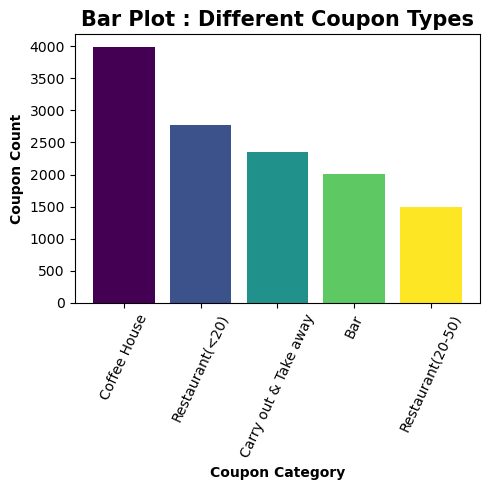

In [23]:
# We can first print the bar plot of the Coupons acceptance layout
# Which of the coupons is most preferred?

coupon_counts = data['coupon'].value_counts()
values = np.random.randint(10, 50, size=len(coupon_counts))
# Generate a list of colors
num_bars = len(coupon_counts)
colors = plt.cm.viridis(np.linspace(0, 1, num_bars))
plt.figure(figsize=(5, 5))  # Set figure size
plt.bar(coupon_counts.index, coupon_counts.values, color=colors)
plt.xlabel("Coupon Category", weight='bold')
plt.ylabel("Coupon Count", weight='bold')
plt.title("Bar Plot : Different Coupon Types", fontsize=15, weight='bold')
plt.xticks(rotation=65)
# Plot
plt.tight_layout()
plt.savefig("../graphplots/CouponTypes.png", bbox_inches='tight')
plt.show()

6. Use a histogram to visualize the temperature column.

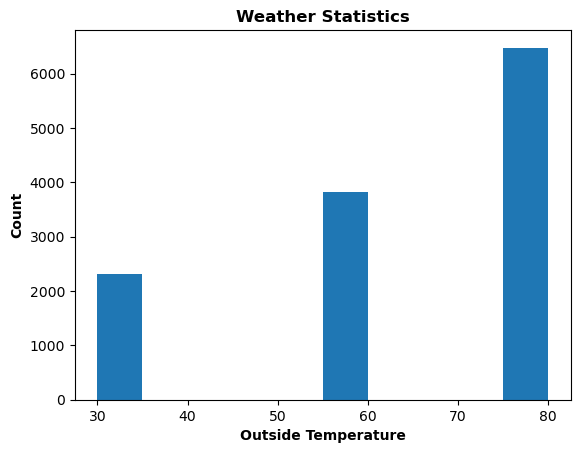

In [25]:
# visualizing the temperatures column to see when consumers really like to go out
# The data file spells out three different temperature category

data['temperature'].hist()
plt.grid(False)
plt.xlabel('Outside Temperature', weight='bold')
plt.ylabel('Count', weight='bold')
plt.title('Weather Statistics', weight='bold')
plt.savefig("../graphplots/Temparature.png")
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [35]:
# The coluple of this cells work on the Bar coupons
# We begin by building a dataframe with just the Bar coupons

bar_coupons = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?

In [37]:
# Calulating the Printing the Proportion of the bar coupons accepted

proportion_of_bar_coupons_accepted = bar_coupons['Y'].mean()
print(f"proportion of bar coupons were accepted = {proportion_of_bar_coupons_accepted:.3f}, in percentage = {proportion_of_bar_coupons_accepted*100}")


proportion of bar coupons were accepted = 0.410, in percentage = 40.99502487562189


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

In [41]:
# Calulating the percentages and printing on...
# Those who went <3 times a month 1~3 and less1 to the bar 

group_1 = None
group_2 = None

group_1 = bar_coupons[(bar_coupons['Bar'] == "1~3") | (bar_coupons['Bar'] == "less1") | (bar_coupons['Bar'] == "never")]
group_2 = bar_coupons[(bar_coupons['Bar'] == "4~8") | (bar_coupons['Bar'] == "gt8")]
acceptance_rate_Of_group_1 = group_1['Y'].mean()
acceptance_rate_Of_group_2 = group_2['Y'].mean()
print(f"Accept.Rate of those who opted for the bar < 3 or fewer times ==> : {acceptance_rate_Of_group_1:.3f} = %{acceptance_rate_Of_group_1*100}")
print(f"Accept.Rate of those who opted for the bar > 3          times ==> : {acceptance_rate_Of_group_2:.3f} = %{acceptance_rate_Of_group_2*100}")

Accept.Rate of those who opted for the bar < 3 or fewer times ==> : 0.371 = %37.051352843732744
Accept.Rate of those who opted for the bar > 3          times ==> : 0.769 = %76.88442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [43]:
# Comparing the accptance rates
# Trying instead of searching based on the bar visits more than once we can go the reverse with the other 2-Options
# The age column is a mess like the visits column, use of datafrome.isin() or .isnot() will help

data['age_to_num'] = data['age'].replace({'below21': 18, '50plus': 51}).astype(int)
bar_coupon = data[data['coupon']== 'Bar']

group_1 = bar_coupon[(bar_coupon['Bar'].isin(['1~3', '4~8', 'gt8'])) &(bar_coupon['age_to_num']>25)]
group_2 = bar_coupon[~((bar_coupon['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupon['age_to_num'] > 25))]

acceptance_rate_group_1 = group_1['Y'].mean()
acceptance_rate_group_2 = group_2['Y'].mean()
print('Drivers Over 25 who go to bar, their acceptance rate', acceptance_rate_group_1, "= %", (acceptance_rate_group_1*100))
print('The Others:', acceptance_rate_group_2, "                                        = %", (acceptance_rate_group_2*100))

Drivers Over 25 who go to bar, their acceptance rate 0.6952380952380952 = % 69.52380952380952
The Others: 0.33459119496855344                                         = % 33.459119496855344


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [47]:
# Calculation of Drivers who go to bars more than once a month
# and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

new_group = bar_coupon[(bar_coupon['Bar'].isin(['1~3', '4~8', 'gt8'])) & (
                                    bar_coupon['passanger'] != 'Kid(s)') & (~bar_coupon['occupation'].isin(['Farming Fishing & Forestry']))]
acceptance_rate_in_new_group = new_group['Y'].mean()
acceptance_rate_ofthe_rest = data[~data.index.isin(new_group.index)]['Y'].mean()

print("\nThe acceptance rate of drivers that go to the bar at least once per month and kids=0           ==> ", acceptance_rate_in_new_group, " = % ",acceptance_rate_in_new_group*100) 
print("\nAcceptance rate Occupation other than Farm, Fish, Forest,                                      ==> ", acceptance_rate_ofthe_rest, " = % ", acceptance_rate_ofthe_rest*100)



The acceptance rate of drivers that go to the bar at least once per month and kids=0           ==>  0.7132486388384754  = %  71.32486388384754

Acceptance rate Occupation other than Farm, Fish, Forest,                                      ==>  0.5609088647483208  = %  56.09088647483208


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.

In [51]:
# Comparing the acceptance rates as per the above statement and storing them in independent variables for use
# in further calculations

#1 bullet
not_widowed = bar_coupon[(bar_coupon['Bar'].isin(['1~3', '4~8', 'gt8']))&(bar_coupon['passanger'] != 'Kid(s)')&(bar_coupon['maritalStatus']!='Widowed')]
#2 bullet
age_under_30 = bar_coupon[(bar_coupon['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupon['age_to_num'] < 30)]
#3 bullet
income_lessthan_50K = bar_coupon[(bar_coupon['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (bar_coupon['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))]

couponAcceptors = (data['Y'] == 1)

print(len(data)) #make sure that the count is intact from  Lin:450 after the data clean up

result_1 = not_widowed['Y'].mean();
result_2 = age_under_30['Y'].mean();
result_3 = income_lessthan_50K['Y'].mean();

print("Acceptance rates of those who go to bars more than once a month, had passengers that were not a kid, and were not widowed", result_1, "=%",result_1*100)
print("Acceptance rates of those who go to bars more than once a month and are under the age of 30 OR                           ", result_2, "=%",result_2*100)
print("Acceptance rates of those who go to cheap restaurants more than 4 times a month and income is less than 50K              ", result_3, "=%",result_3*100)


12610
Acceptance rates of those who go to bars more than once a month, had passengers that were not a kid, and were not widowed 0.7132486388384754 =% 71.32486388384754
Acceptance rates of those who go to bars more than once a month and are under the age of 30 OR                            0.7217391304347827 =% 72.17391304347827
Acceptance rates of those who go to cheap restaurants more than 4 times a month and income is less than 50K               0.45348837209302323 =% 45.348837209302324


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [53]:
print('\n' + '\033[1m' + 'Hypothesis:' + '\033[0m')
print('------------------------------------------')
print("""
1> Age Factor                     : 72% of the young adults who are less than 30yrs frequent the bar often more than once a month, and they also willingly 
                                    accept coupons
2> Prefer Cheaper Places          : People who make less income seems to prefer cheaper dining places
3> Atleast 1 Bar visit a month    : Is primarily among those who don't have any kids - Kind of social animals
4> Bar visits to Frequency        : There is one more trait and thats to do with frequency of bar visits and the acceptance rate of coupons
5> Occupation and Acceptance      : People who do NOT fish, farm or are involved in forestery seem to lean towards accepting coupons 56.0%
6> Drivers Over 25 and compared to:
                       rest others: Not much of acceptance (33%)
""")


Hypothesis:
------------------------------------------

1> Age Factor                     : 72% of the young adults who are less than 30yrs frequent the bar often more than once a month, and they also willingly 
                                    accept coupons
2> Prefer Cheaper Places          : People who make less income seems to prefer cheaper dining places
3> Atleast 1 Bar visit a month    : Is primarily among those who don't have any kids - Kind of social animals
4> Bar visits to Frequency        : There is one more trait and thats to do with frequency of bar visits and the acceptance rate of coupons
5> Occupation and Acceptance      : People who do NOT fish, farm or are involved in forestery seem to lean towards accepting coupons 56.0%
6> Drivers Over 25 and compared to:
                       rest others: Not much of acceptance (33%)



### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [57]:
# Checking on those who prefer coffe house coupons 
# This would primarily be the Independent investigation into another of the coupons. 
# Begin with who accepts coffe house coupons

prefer_coffee_house_coupons = data[(data['coupon']=='Coffee House') & (data['Y']==1)]
#print(prefer_coffee_house_coupons.info())

Distribution by Age:
 age_to_num
21    23.278029
26    21.820010
31    14.781297
51    11.513323
36     9.451986
41     8.195073
46     5.530417
18     5.429864
Name: proportion, dtype: float64


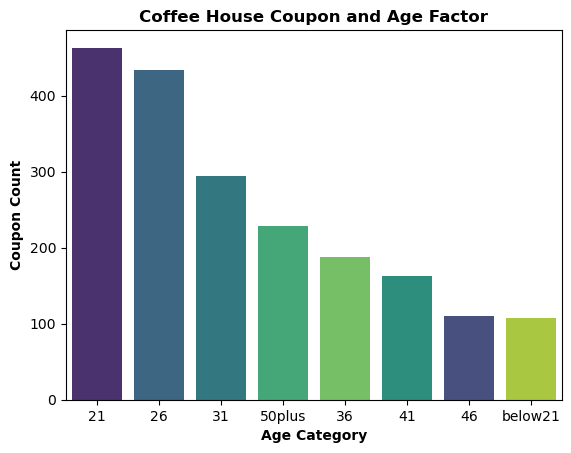

In [61]:
# Normalize to decimals returns the relative frequency by dividing all values by the sum of values.
# Lets take these numbers and print this accross several graphs

distr_by_age = (prefer_coffee_house_coupons['age_to_num'].value_counts(normalize=True)*100)
print('Distribution by Age:\n', distr_by_age)
plt.title('Coffee House Coupon and Age Factor', weight='bold');
plt.xlabel("Age Category", weight='bold')
plt.ylabel("Coupon Count", weight='bold')
sns.countplot(x='age', data=prefer_coffee_house_coupons, palette='viridis', hue='age', order = prefer_coffee_house_coupons['age'].value_counts().index, legend=False)
plt.savefig("../graphplots/CoffeeHouseAndAge.png")

Distribution by Occupation:
 occupation
Student                                      15.686275
Unemployed                                   15.535445
Computer & Mathematical                      11.211664
Sales & Related                               6.988436
Management                                    6.686777
Education&Training&Library                    6.485671
Arts Design Entertainment Sports & Media      5.329311
Office & Administrative Support               4.273504
Business & Financial                          3.519356
Retired                                       3.318250
Healthcare Practitioners & Technical          2.765209
Transportation & Material Moving              2.362996
Healthcare Support                            2.011061
Food Preparation & Serving Related            1.860231
Architecture & Engineering                    1.759678
Life Physical Social Science                  1.458019
Community & Social Services                   1.307190
Legal                    

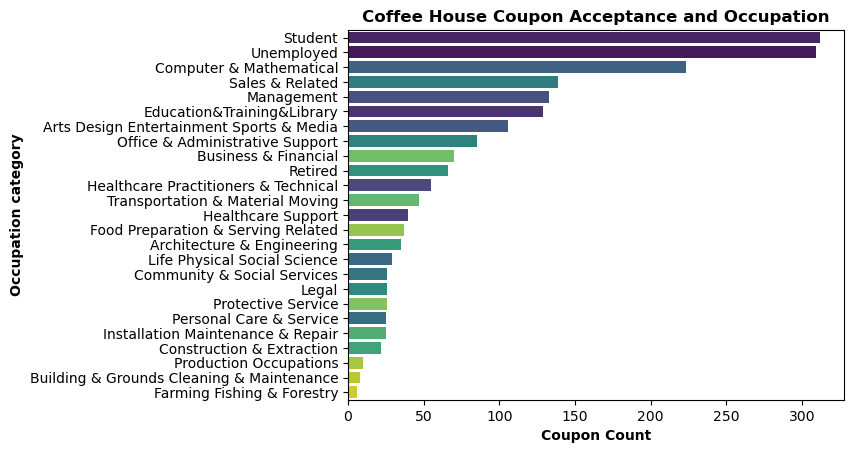

In [63]:
# Coffee House coupons acceptance by Occupations
# Again normalize to decimals returns the relative frequency by dividing all values by the sum of values.

distr_by_occupation = prefer_coffee_house_coupons['occupation'].value_counts(normalize=True)*100 
print('Distribution by Occupation:\n', distr_by_occupation)
plt.title('Coffee House Coupon Acceptance and Occupation', weight='bold');
plt.ylabel("Occupation category", weight='bold')
plt.xlabel("Coupon Count", weight='bold')
plt.xticks(fontsize=10)
sns.countplot(y='occupation', data=prefer_coffee_house_coupons, palette='viridis', hue='occupation', order = prefer_coffee_house_coupons['occupation'].value_counts().index, legend=False)
plt.savefig("../graphplots/CoffeeHouseAndOccupationMapping.png")

Distribution by Marital Status:
 maritalStatus
Single               40.221217
Married partner      37.908497
Unmarried partner    17.244847
Divorced              3.971845
Widowed               0.653595
Name: proportion, dtype: float64


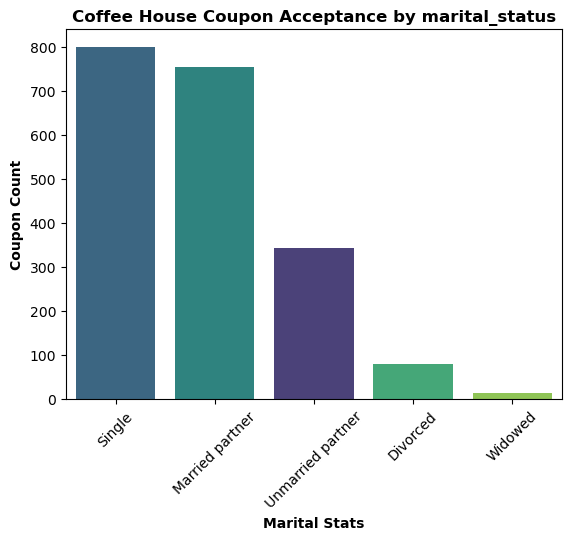

In [65]:
# Coffee House visitors and marital status
distr_by_maritalstatus = prefer_coffee_house_coupons['maritalStatus'].value_counts(normalize=True) * 100
print('Distribution by Marital Status:\n', distr_by_maritalstatus)
plt.title('Coffee House Coupon Acceptance by marital_status', weight='bold');
plt.xlabel("Marital Stats", weight='bold')
plt.ylabel("Coupon Count", weight='bold')
plt.xticks(fontsize=10)
plt.xticks(rotation=45)
sns.countplot(x='maritalStatus', data=prefer_coffee_house_coupons, palette='viridis', hue='maritalStatus', order = prefer_coffee_house_coupons['maritalStatus'].value_counts().index, legend=False)
plt.savefig("../graphplots/CoffeeHouseAndMaritalStats.png", bbox_inches='tight')


Distribution by Education:
 education
Some college - no degree                  35.394671
Bachelors degree                          31.875314
Graduate degree (Masters or Doctorate)    15.183509
Associates degree                          9.100050
High School Graduate                       7.591755
Some High School                           0.854701
Name: proportion, dtype: float64


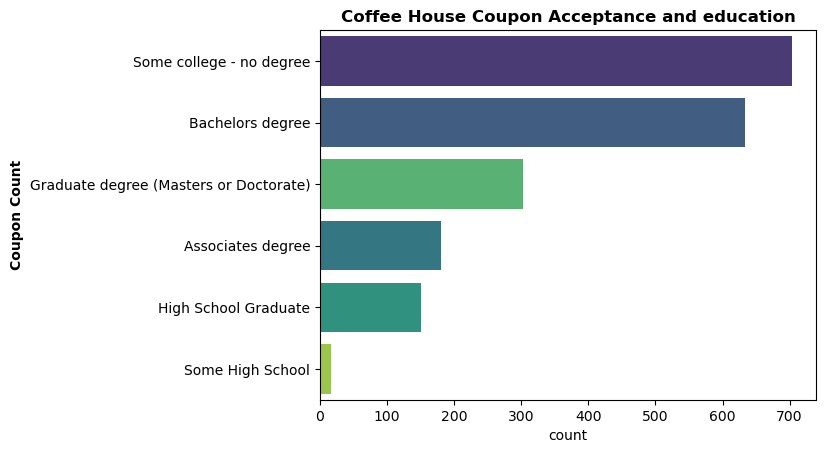

In [69]:
# Coffee House Coupons and printing Distribution with education 

distr_by_edu = prefer_coffee_house_coupons['education'].value_counts(normalize=True) * 100
print('Distribution by Education:\n', distr_by_edu)
plt.title('Coffee House Coupon Acceptance and education', weight='bold');
plt.ylabel("Education category", weight='bold')
plt.ylabel("Coupon Count", weight='bold')
#plt.xticks(fontsize=10)
#plt.xticks(rotation=45)
sns.countplot(y='education', data=prefer_coffee_house_coupons, palette='viridis', hue='education', order = prefer_coffee_house_coupons['education'].value_counts().index, legend=False)
plt.savefig("../graphplots/CoffeeHouseAndOccupationMapping.png", bbox_inches='tight')


In [71]:
print('\n' + '\033[1m' + 'Independent Investigation Findings on {Coffee House Coupon\'s} Acceptors:' + '\033[0m')
print('------------------------------------------')
print("""
1> Looks like the category of people who accept coffee house coupons are more in the 20's. 
2> Interestingly people with no or some college education possibly socialize a lot than the one with a bit of higher education, student community 
   are also more on the acceptance side of the graph.
3> More of the professional working group members seems to not accept coffee house coupons. Possible they prefer some other form of coupons
4> Divorced and those with single status looks to be not socializing much or going out.
""")


Independent Investigation Findings on {Coffee House Coupon's} Acceptors:
------------------------------------------

1> Looks like the category of people who accept coffee house coupons are more in the 20's. 
2> Interestingly people with no or some college education possibly socialize a lot than the one with a bit of higher education, student community 
   are also more on the acceptance side of the graph.
3> More of the professional working group members seems to not accept coffee house coupons. Possible they prefer some other form of coupons
4> Divorced and those with single status looks to be not socializing much or going out.

